<a href="https://colab.research.google.com/github/theopenhighway/machinelearning-zoomcamp/blob/main/homework_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a regression model for predicting housing prices (column median_house_value)

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

%matplotlib inline

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [138]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

    Load the data.
    Look at the median_house_value variable. Does it have a long tail?


<ipython-input-139-13af495c6d13>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.median_house_value)


<Axes: xlabel='median_house_value', ylabel='Density'>

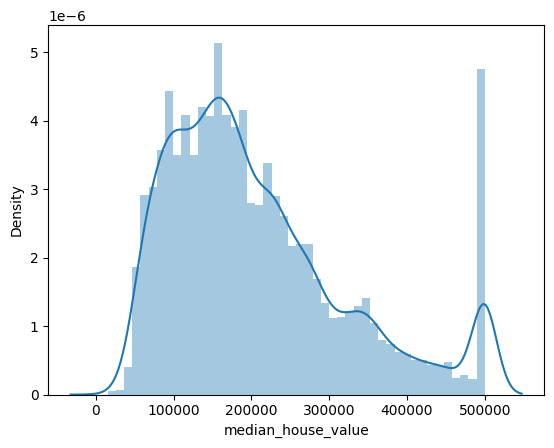

In [139]:
sns.distplot(df.median_house_value)

## Preparing the Dataset

In [140]:
cc = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [141]:
df2 = df[cc][(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df2

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1

There's one feature with missing values. What is it?

    total_rooms
    **total_bedrooms**
    population
    households


In [142]:
df2.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'population'?

    995
    1095
    **1195**
    1295


In [143]:
df2.population.median()

1195.0

## Prepare and split the dataset

    Shuffle the initial dataset, use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [144]:
n = len(df2)
idx = np.arange(n)

nVal = int(n*0.2)
nTest = int(n*0.2)
nTrain = n - nVal - nTest
np.random.seed(42)
np.random.shuffle(idx)

In [145]:
dfTrain = df2.iloc[idx[:nTrain]]
dfVal = df2.iloc[idx[nTrain:nTrain+nVal]]
dfTest = df2.iloc[idx[nVal+nTrain:]]

dfTrain=dfTrain.reset_index(drop=True)
dfVal=dfVal.reset_index(drop=True)
dfTest=dfTest.reset_index(drop=True)

In [146]:
yTrain = np.log1p(dfTrain.median_house_value.values)
yVal = np.log1p(dfVal.median_house_value.values)
yTest = np.log1p(dfTest.median_house_value.values)

In [147]:
del dfTrain['median_house_value']
del dfVal['median_house_value']
del dfTest['median_house_value']

## Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?

Options:

    With 0
    With mean
    **Both are equally good**


### With mean

In [148]:
dfTrain.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [149]:
mean = dfTrain.total_bedrooms.mean()
mean

542.552956325786

In [150]:
ccRev = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
xTrain = dfTrain[ccRev].values
xTrain

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [151]:
yTrain

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [152]:
def trainLinRegres(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTXinv = np.linalg.inv(XTX)
  wFull = XTXinv.dot(X.T).dot(y)
  return wFull[0],wFull[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def prepareX(df, fillna_value):
  dfNum = df[ccRev]
  dfNum = dfNum.fillna(fillna_value)
  x = dfNum.values

  return x

In [153]:
xMeanTrain = prepareX(dfTrain, fillna_value = mean)
xMeanTrain

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [154]:
w0Mean,wMean = trainLinRegres(xMeanTrain, yTrain)

In [155]:
xMeanVal = prepareX(dfVal, fillna_value = mean)
yMeanPredVal = w0Mean + xMeanVal.dot(wMean)

In [156]:
yMeanPredVal

array([11.71462282, 12.47428049, 11.84127314, ..., 12.39294053,
       12.05541417, 12.06224727])

In [157]:
yVal

array([11.3095968 , 12.27326857, 11.95247633, ..., 12.53968723,
       12.34279083, 11.97477721])

In [158]:
np.round(rmse(yVal, yMeanPredVal),2)

0.34

### With zero

In [159]:
xNullTrain = prepareX(dfTrain, fillna_value = 0)

In [160]:
w0Null, wNull = trainLinRegres(xNullTrain, yTrain)

In [161]:
xNullVal = prepareX(dfVal,  fillna_value = 0)
yNullPredVal = w0Null + xNullVal.dot(wNull)

In [162]:
np.round(rmse(yVal, yNullPredVal),2)

0.34

## Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001


In [163]:
def trainLinRegresRes(X,y, r=0.01):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTXinv = np.linalg.inv(XTX)
  wFull = XTXinv.dot(X.T).dot(y)

  return wFull[0],wFull[1:]

In [164]:
for r in [0, 0.000001, 0.0001, 0.001]:
  w0,w = trainLinRegresRes(xNullTrain, yTrain, r=r)
  yPred = w0 + xNullVal.dot(w)
  score = round(rmse(yVal, yPred),2)

  print(r,w0,score)

0 -9.763249477872478 0.34
1e-06 -9.763228830761964 0.34
0.0001 -9.761185235634128 0.34
0.001 -9.742646249295081 0.34


## Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    0.5
    0.05
    0.005
    0.0005


In [170]:
rmse1 = []

for seed in range(0,10):
  n = len(df2)
  idx = np.arange(n)

  nVal = int(n*0.2)
  nTest = int(n*0.2)
  nTrain = n - nVal - nTest
  np.random.seed(seed)
  np.random.shuffle(idx)

  df2Shuffled = df2.iloc[idx]

  dfTrain = df2Shuffled.iloc[:nTrain]
  dfVal = df2Shuffled.iloc[nTrain:nTrain+nVal]
  dfTest = df2Shuffled.iloc[nVal+nTrain:]

  dfTrain=dfTrain.reset_index(drop=True)
  dfVal=dfVal.reset_index(drop=True)
  dfTest=dfTest.reset_index(drop=True)

  yTrain = np.log1p(dfTrain.median_house_value.values)
  yVal = np.log1p(dfVal.median_house_value.values)
  yTest = np.log1p(dfTest.median_house_value.values)

  del dfTrain['median_house_value']
  del dfVal['median_house_value']
  del dfTest['median_house_value']

  xTrain = prepareX(dfTrain, 0)
  w0, w = trainLinRegresRes(xTrain, yTrain,0.001)

  xVal = prepareX(dfVal,  fillna_value = 0)
  yValNull = w0Null + xVal.dot(w)

  # print(yTrain, yValNull)
  wwd = round(rmse(yVal, yValNull),2)
  rmse1.append(wwd)


# rmse

In [171]:
rmse1

[0.35, 0.75, 0.36, 0.56, 0.7, 0.4, 0.43, 0.67, 0.37, 0.38]

In [172]:
np.std(rmse1)

0.14940214188558343

## Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.13
    0.23
    0.33
    0.43


In [174]:
n = len(df2)
idx = np.arange(n)

nVal = int(n*0.2)
nTest = int(n*0.2)
nTrain = n - nVal - nTest
np.random.seed(9)
np.random.shuffle(idx)

df2Shuffled = df2.iloc[idx]

dfTrain = df2Shuffled.iloc[:nTrain]
dfVal = df2Shuffled.iloc[nTrain:nTrain+nVal]
dfTest = df2Shuffled.iloc[nVal+nTrain:]

frames = [dfTrain, dfVal]
dfTrainVal = pd.concat(frames)

dfTrainVal=dfTrain.reset_index(drop=True)
dfTest=dfTest.reset_index(drop=True)


yTrainValOrig = dfTrainVal.median_house_value.values
yTestOrig = dfTest.median_house_value.values

yTrainVal = np.log1p(yTrainValOrig)
yTest = np.log1p(yTestOrig)

del dfTrainVal['median_house_value']
del dfTest['median_house_value']

xTrainVal = prepareX(dfTrain, 0)
w0TrainVal, wTrainVal = trainLinRegresRes(xTrainVal, yTrainVal, 0.001)

xTest = prepareX(dfTest,  fillna_value = 0)
yNullTest = w0TrainVal + xTest.dot(wTrainVal)

# print(yTrain, yValNull)
wwd = round(rmse(yTest, yNullTest),2)

wwd

0.33